## 1. Yolov4-tiny 학습 결과 생성된 .weights를 .tflite 형식으로 변환

In [ ]:
# 텐서플로우 2.3.0 설치
!pip install tensorflow==2.3.0
import tensorflow as tf

#yolov4를 tflite로 변환해주기 위해 git 클론
!git clone https://github.com/hunglc007/tensorflow-yolov4-tflite
!cp /content/drive/MyDrive/config.py /content/tensorflow-yolov4-tflite/core/config.py #목적에 맞게 설정한 config.py를 설치한 텐서플로우 내의 config.py로 변경

#.weight를 .tflite로 변환 후 저장
!python /content/tensorflow-yolov4-tflite/save_model.py --weights /content/yolov4-tiny.weights --output /content/yolov4-my-tiny-out-416 --input_size 416 --model yolov4 --tiny --framework tflite
!pip install opencv-python
!pip install easydict
!python /content/tensorflow-yolov4-tflite/convert_tflite.py --weights /content/yolov4-my-tiny-out-416 --output /content/yolov4-my-tiny-out-416.tflite

1-1. config.py 에서 __C.YOLO.CLASSES 부분의 경로를 수정 하여 Yolov4-tiny 학습 때 사용한 names를 적용
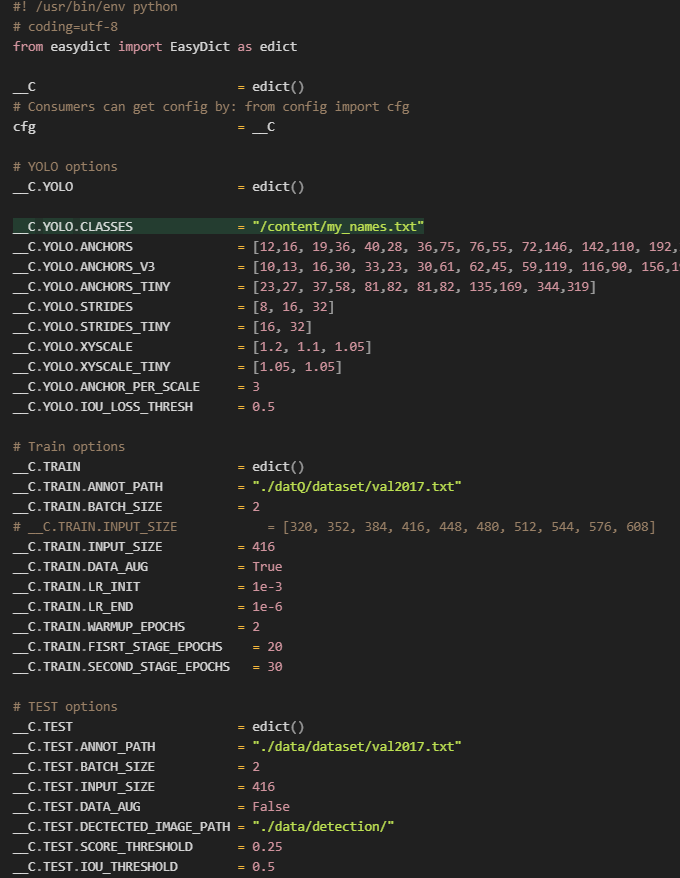

## 2. Tensorflow Android 예제 파일에서 .tflite  파일을 위에서 만든 .yolov4-my-tiny-out-416.tflite 으로 변경
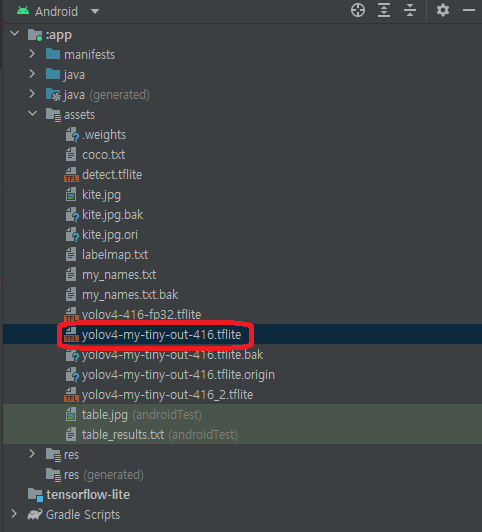

## 3. Tensorflow Android 예제 파일에서 mynames.txt의 내용 수정 (학습 때 사용한 names로 변경 “empty”, “full”)
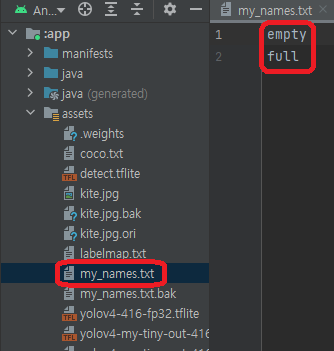

## 4. 스마트폰 카메라로 인식한 결과 “empty”일 경우 파란색 바운딩 박스로, 결과가 “full”일 경우 빨간색 바운딩 박스로 표시하기 위해 다음 코드를 MultiBoxTracker.java에 추가

In [ ]:
#객체 인식 결과가 "empty" 일 경우 파란색 바운딩박스를, "full"인 경우 빨간색 바운딩 박스를 그리도록 설정
for (final TrackedRecognition recognition : trackedObjects) {
      final RectF trackedPos = new RectF(recognition.location);

      getFrameToCanvasMatrix().mapRect(trackedPos);
      if (Objects.equals(recognition.title, "empty")) {
        boxPaint.setColor(Color.BLUE);
      }
      else if (Objects.equals(recognition.title, "full")) {
        boxPaint.setColor(Color.RED);
      }

## 5.결과

참고
1. https://webnautes.tistory.com/1417
2. https://github.com/hunglc007/tensorflow-yolov4-tflite
3. https://junyoung-jamong.github.io/machine/learning/2019/01/25/Android%EC%97%90%EC%84%9C-%EB%82%B4-YOLO%EB%AA%A8%EB%8D%B8-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0.html